In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
%matplotlib inline

In [5]:
df = pd.read_csv('loan.csv', index_col=0)
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


Will I get a loan at 12% or better - this is a yes no answer, so it is a logistic regression questions

In [6]:
df['approved'] = df['Interest.Rate'] <= 12
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,approved
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False
13,21.67,670,60,14166.67,28000,False
21,21.98,665,36,6666.67,22000,False


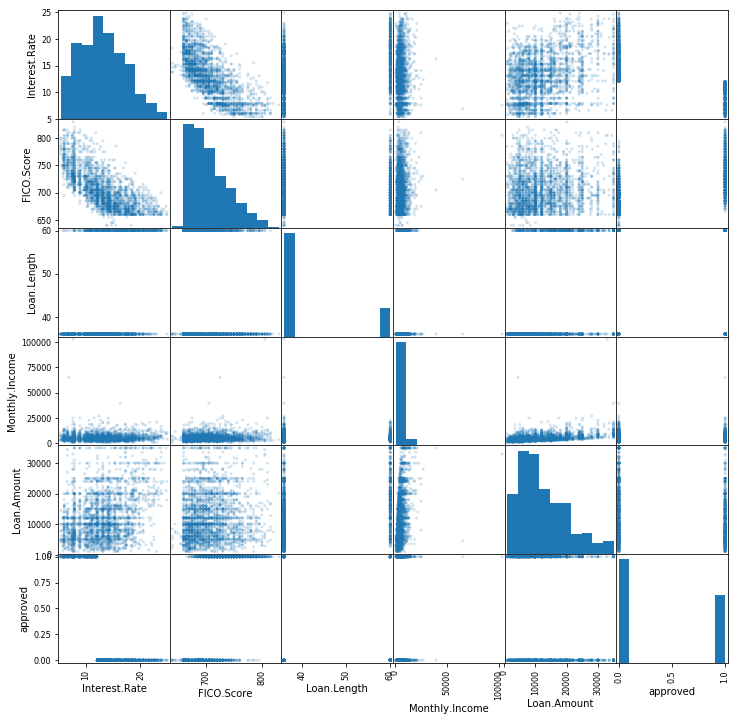

In [7]:
scatter_matrix(df, alpha=0.2, figsize=(12,12))
None

In [8]:
y=df.approved
X=df[['FICO.Score']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
model = LogisticRegression().fit(X_train, y_train)

In [11]:
model.score(X_test, y_test)

0.78181818181818186

We were right 99.5 (or the score that comes up) percent of the time. This comes from the true negatives + true positive over all observations

To determine if you have NAs look at df.info(). If the number of colums are different, you have NAs in there

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6 to 2497
Data columns (total 6 columns):
Interest.Rate     2500 non-null float64
FICO.Score        2500 non-null int64
Loan.Length       2500 non-null int64
Monthly.Income    2499 non-null float64
Loan.Amount       2500 non-null int64
approved          2500 non-null bool
dtypes: bool(1), float64(2), int64(3)
memory usage: 199.6 KB


In [12]:
df_2=df.dropna(axis=0, how='any')
df_2.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,approved
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False
13,21.67,670,60,14166.67,28000,False
21,21.98,665,36,6666.67,22000,False


In [13]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2499.0,13.069252,4.177544,5.42,10.16,13.11,15.8,24.89
FICO.Score,2499.0,705.850340,34.989522,640.00,680.00,700.00,725.0,830.00
Loan.Length,2499.0,41.262905,9.932322,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2499.0,12409.463786,7801.698448,1000.00,6000.00,10000.00,17000.0,35000.00


In [22]:
from itertools import combinations
rows = []
for i in range(1,5):
    combos = list(combinations(['FICO.Score', 'Loan.Length', 'Monthly.Income' ,'Loan.Amount'],i))
    for j,com in enumerate(combos):
        y = df_2.approved
        X = pd.DataFrame(df_2, columns=com)
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=22)
        model = LogisticRegression(fit_intercept = True)
        accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
        s = ', '.join(com)
        rows.append({'Accuracy':accuracy, 'Combos':s})
        # print('score:', score, 'columns:', s)
df1 = pd.DataFrame(rows)
df1.head(10) 

,Accuracy,Combos
0,0.765154,FICO.Score
1,0.603441,Loan.Length
2,0.603040,Monthly.Income
3,0.603441,Loan.Amount
4,0.837152,"FICO.Score, Loan.Length"
5,0.603441,"FICO.Score, Monthly.Income"
6,0.622307,"FICO.Score, Loan.Amount"
7,0.605836,"Loan.Length, Monthly.Income"
8,0.603441,"Loan.Length, Loan.Amount"
9,0.612294,"Monthly.Income, Loan.Amount"


In [19]:
df1.iloc[df1.Score.idxmax()] 

Combos    FICO.Score, Loan.Length, Monthly.Income
Score                                    0.856703
Name: 10, dtype: object

In [23]:
model.fit(X,y).coef_

array([[  5.20492716e-03,  -9.25245934e-02,   3.81081628e-05,
         -4.94079826e-05]])

In [24]:
model.fit(X,y).intercept_ 

array([-0.00288621])

In [29]:
m1 = LogisticRegression().fit(df[['FICO.Score']], df.approved) 

In [30]:
m1.coef_

array([[ 0.02409042]])

In [31]:
m1.intercept_

array([-17.42561664])

In [32]:
m1.predict?

In [34]:
m1.predict([[715]])

array([False], dtype=bool)

You can change the 715 to any FICO Score number and it would tell you if the person would get a loan or not.

In [35]:
y = df.approved
X= df[['FICO.Score']]

Confusion Matrix:
 1. Train Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

2. Pass through test values

In [37]:
y_hat = m1.predict(X_test)

In [39]:
confusion_matrix(y_test, y_hat).ravel()

array([469,  34, 131, 191], dtype=int64)

Results are: (tn, fp, fn, tp)

In [40]:
m1.score(X_test, y_test)

0.80000000000000004

In [41]:
accuracy = (191+469)/(469 + 34 + 131 + 191)
accuracy

0.8

In [42]:
precision = (191)/(34 + 191)
precision

0.8488888888888889

In [43]:
recall = (191)/(131 + 191)
recall

0.593167701863354